# Preprocessing the Indonesian Hate & Abusive Text 
The original paper [1] preprocess the data in 5 steps:
1. Lower casing all text, 
2. Data cleaning by removing unnecessary characters such as re-tweet symbol (RT), username, URL, and punctuation
3. Normalization using 'Alay' dictionary 
4. Stemming using PySastrawi [2]
5. Stop words removal using list from [3]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load data

In [4]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

alay_dict = pd.read_csv('data/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 1: 'replacement'})

id_stopword_dict = pd.read_csv('data/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

### Text Data

In [5]:
print("Shape: ", df.shape)
df.head(5)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [8]:
df.Abusive.value_counts()


0    8126
1    5043
Name: Abusive, dtype: int64

In [9]:
df.HS.value_counts()


0    7608
1    5561
Name: HS, dtype: int64

In [10]:
def klasifikasi(HS):
    if (HS == 1):
        return 'Yes'
    elif (HS == 0):
        return 'No'


def klasifikasi(Abusive):
    if (Abusive == 1):
        return 'Yes'
    elif (Abusive == 0):
        return 'No'


df['Tipe klasifikasi HS'] = df['HS'].apply(lambda x: klasifikasi(x))
df['Tipe klasifikasi Abusive'] = df['Abusive'].apply(lambda x: klasifikasi(x))
df.head()


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tipe klasifikasi HS,Tipe klasifikasi Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Yes,Yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,No,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,No,No
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,No,No
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Yes,Yes


In [11]:
klasifikasi = df[["Tweet", "HS", "Abusive", "Tipe klasifikasi HS", "Tipe klasifikasi Abusive"]]
klasifikasi.head()


,Tweet,HS,Abusive,Tipe klasifikasi HS,Tipe klasifikasi Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1,1,Yes,Yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,No,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,No,No
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,No,No
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,Yes,Yes


In [18]:
klasifikasi = df["Tweet"]
klasifikasi.head(10)
klasifikasi.tail(10)


13159    Ada 2 buku aktivitas Angry Birds the Movie yan...
13160    [NOSTALGIA DENGAN BUDAYA]; ; nosÂ·talÂ·gia n k...
13161    brengsek itu orang terbuat dr apa bikin gue be...
13162    Kapolda Babi! Biadap dan Bodoh! Gak punya otak...
13163    Orang Yahudi, Kristen dan Muslim yang belum pe...
13164    USER jangan asal ngomong ndasmu. congor lu yg ...
13165                         USER Kasur mana enak kunyuk'
13166    USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167    USER USER USER USER Bom yang real mudah terdet...
13168    USER Mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, dtype: object

In [13]:
my_color = ['#dce7ec', '#2254c5']
klasifikasi['Tipe klasifikasi HS'].value_counts().plot(
    kind='pie', figsize=(5, 5), autopct='%1.f%%', startangle=90, shadow=False, colors=my_color)

plt.legend(['No', 'Yes'])
plt.title('Klasifikasi Tweet Berdasarkan Hate Speech Pada Dataset Twitter')

plt.show()


KeyError: 'Tipe klasifikasi HS'

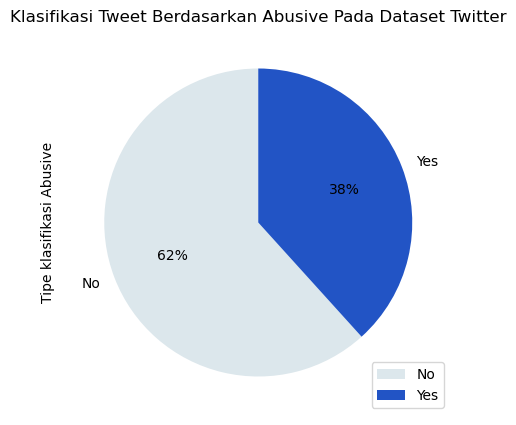

In [ ]:
my_color = ['#dce7ec', '#2254c5']
klasifikasi['Tipe klasifikasi Abusive'].value_counts().plot(
    kind='pie', figsize=(5, 5), autopct='%1.f%%', startangle=90, shadow=False, colors=my_color)

plt.legend(['No', 'Yes'])
plt.title('Klasifikasi Tweet Berdasarkan Abusive Pada Dataset Twitter')

plt.show()


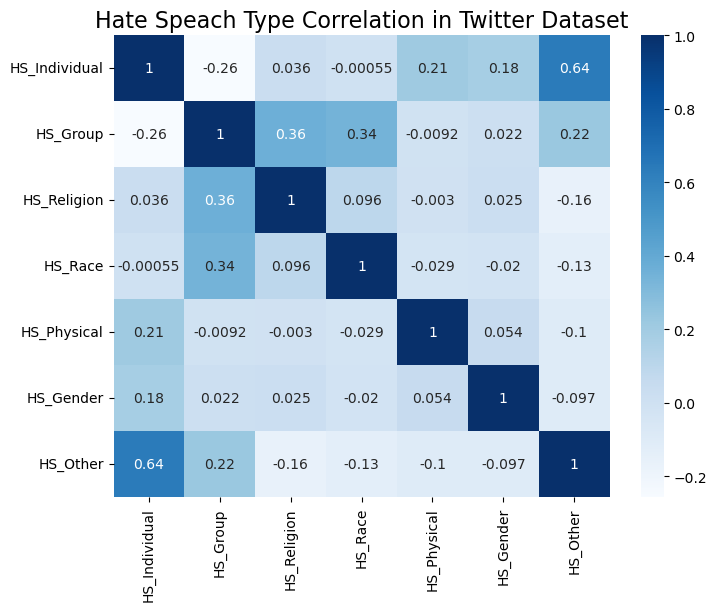

In [ ]:
import seaborn as sns
jenis_HS = df[["HS_Individual", "HS_Group", "HS_Religion",
                    "HS_Race", "HS_Physical", "HS_Gender", "HS_Other"]]
corr = jenis_HS.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(jenis_HS.corr(), annot=True, cmap='Blues')

plt.title('Hate Speach Type Correlation in Twitter Dataset', size=16)

plt.show()


In [ ]:
df1 = df[['HS_Individual', 'HS_Group']]
df1.sum()


HS_Individual    3575
HS_Group         1986
dtype: int64

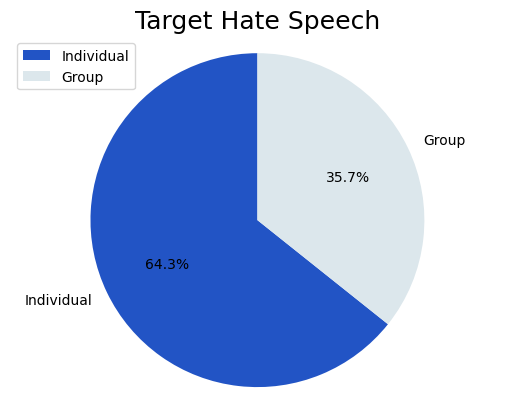

In [ ]:
target_HS = ("Individual", "Group")
HS1 = (3575, 1986)
my_color = ['#2254c5', '#dce7ec']

fig1, ax1 = plt.subplots()
ax1.pie(HS1, labels=target_HS, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=my_color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Target Hate Speech', fontsize=18)
ax1.legend(target_HS, loc="best")
plt.show()


In [ ]:
df2 = df[['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']]
df2.sum()


HS_Religion     793
HS_Race         566
HS_Physical     323
HS_Gender       306
HS_Other       3740
dtype: int64

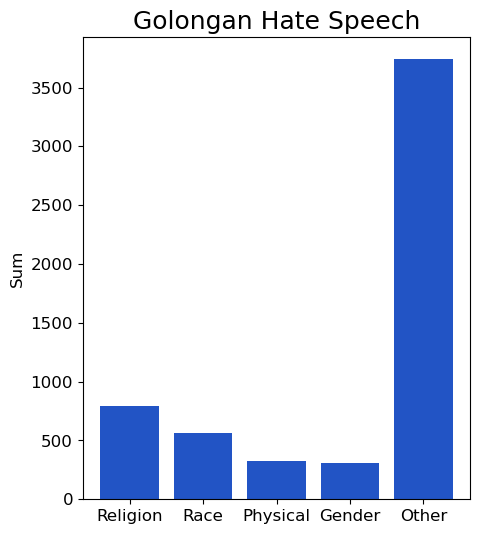

In [ ]:
tipe_HS = ("Religion", "Race", "Physical", "Gender", "Other")
HS1 = (793, 566, 323, 306, 3740)
my_color = '#2254c5'

plt.figure(figsize=(5, 6))
plt.bar(tipe_HS, HS1, color=my_color,)

plt.title('Golongan Hate Speech', size=18,)
plt.ylabel('Sum', size=12)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()


In [ ]:
df3 = df[['HS_Weak', 'HS_Moderate', 'HS_Strong']]
df3.sum()


HS_Weak        3383
HS_Moderate    1705
HS_Strong       473
dtype: int64

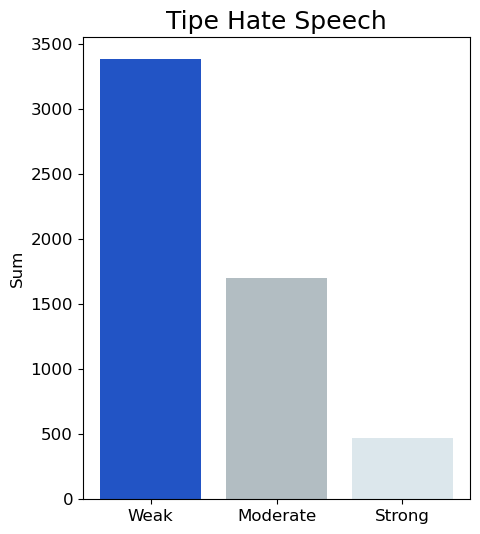

In [ ]:
tipe_HS = ("Weak", "Moderate", "Strong")
HS1 = (3383, 1705, 473)
my_color = '#2254c5', '#b2bdc2', '#dce7ec'

plt.figure(figsize=(5, 6))
plt.bar(tipe_HS, HS1, color=my_color,)

plt.title('Tipe Hate Speech', size=18)
plt.ylabel('Sum', size=12)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()


### Alay Dict

In [ ]:
print("Shape: ", alay_dict.shape)
alay_dict.head(15)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


### ID Stopword

In [ ]:
print("Shape: ", id_stopword_dict.shape)
id_stopword_dict.head()


Shape:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


# Preprocess

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()


def lowercase(text):  
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text) # Remove unicode characters
    text = re.sub(r'pic.twitter.com.[\w]+', '', text)  # Remove every pic
    text = re.sub("#[A-Za-z0-9_]+","", text) # Remove hastag & mention
    text = re.sub("\$", "", text)  # Remove market ticker
    text = re.sub('gue', 'saya', text)  # replace gue - saya
    text = re.sub(r':', '', text) #Remove symbol 
    text = re.sub(r'‚Ä¶', '', text) #Remove symbol Ä¶
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("stemming: ", stemming("Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))
print("remove_stopword: ", remove_stopword("ada hehe adalah huhu yang hehe"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
stemming:  ekonomi indonesia sedang dalam tumbuh yang bangga
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis
remove_stopword:  hehe huhu hehe


In [ ]:
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = stemming(text) # 4
    text = remove_stopword(text) # 5
    return text

In [ ]:
data['Tweet'] = data['Tweet'].apply(preprocess)

NameError: name 'data' is not defined

In [ ]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit lihat,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir lihat dongok dungu haha,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak kawan kawan xf0 x9f x98 x84 xf0...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilih kepala daerah 2018 aman anti h...,0,0,0,0,0,0,0,0,0,0,0,0
7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0
8,admin belanja po nak makan ais kepal milo ais ...,0,0,0,0,0,0,0,0,0,0,0,0
9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0


# Save Preprocessed Data

In [ ]:
data.to_csv('preprocessed_indonesian_toxic_tweet.csv', index=False)